### ESMA 4016
### Regresion Logistica con las libreria H20  y scikit-learn
#### Edgar Acuna

In [1]:
import h2o
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.glm   import H2OGeneralizedLinearEstimator

h2o.init()
h2o.no_progress()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,13 hours 26 mins
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.6
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_edgar2017_586gr1
H2O cluster total nodes:,1
H2O cluster free memory:,1.590 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### I- Aplicando Naive Bayes a  Diabetes usando H20

In [2]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ONaiveBayesEstimator()
model.train(myx, myy, training_frame = diabetes)
y_pred=model.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))

0.72265625


### II -Aplicando Naive Bayes al dataset  Loan que tiene datos continuos y categoricos usando H20

In [3]:
loan = h2o.import_file("https://academic.uprm.edu/eacuna/datosarbol.csv")
loan

Sexo,Familia,CasPropia,AnosEmpleo,Sueldo,StatustMarital,Prestamo
Hombre,3,No,17,2500,Soltero,No
Mujer,5,Si,10,3000,Casado,Si
Mujer,4,No,15,2000,Viudo,No
Hombre,3,Si,16,2800,Soltero,Si
Hombre,6,Si,11,4000,Viudo,Si
Mujer,4,Si,26,3200,Soltero,Si
Mujer,2,Si,14,1800,Soltero,No
Hombre,5,Si,10,3750,Casado,Si
Hombre,6,No,18,2970,Divorciado,No
Hombre,4,Si,12,3350,Divorciado,No


In [4]:
myx=['Sexo','Familia','CasPropia', 'AnosEmpleo','Sueldo','StatustMarital']
loan['Prestamo']=loan['Prestamo'].asfactor()
myy="Prestamo"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ONaiveBayesEstimator()
model.train(myx, myy, training_frame = loan)
y_pred=model.predict(loan)
print (y_pred['predict']==loan['Prestamo']).sum()/float(len(loan))
model.model_performance(loan)

0.88

ModelMetricsBinomial: naivebayes
** Reported on test data. **

MSE: 0.0854946728279
RMSE: 0.29239472093
LogLoss: 0.277825390866
Mean Per-Class Error: 0.1
AUC: 0.96
Gini: 0.92
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.458241448484: 


,No,Si,Error,Rate
No,7.0,3.0,0.3,(3.0/10.0)
Si,0.0,15.0,0.0,(0.0/15.0)
Total,7.0,18.0,0.12,(3.0/25.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4582414,0.9090909,17.0
max f2,0.4582414,0.9615385,17.0
max f0point5,0.6756497,0.9523810,11.0
max accuracy,0.6756497,0.88,11.0
max precision,0.9996507,1.0,0.0
max recall,0.4582414,1.0,17.0
max specificity,0.9996507,1.0,0.0
max absolute_mcc,0.6756497,0.7844645,11.0
max min_per_class_accuracy,0.5195887,0.8666667,13.0
max mean_per_class_accuracy,0.6756497,0.9,11.0


Gains/Lift Table: Avg response rate: 60.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.04,0.9995576,1.6666667,1.6666667,1.0,1.0,0.0666667,0.0666667,66.6666667,66.6666667
,2,0.04,0.9994645,0.0,1.6666667,0.0,1.0,0.0,0.0666667,-100.0,66.6666667
,3,0.04,0.9993714,0.0,1.6666667,0.0,1.0,0.0,0.0666667,-100.0,66.6666667
,4,0.04,0.9992784,0.0,1.6666667,0.0,1.0,0.0,0.0666667,-100.0,66.6666667
,5,0.08,0.9992516,1.6666667,1.6666667,1.0,1.0,0.0666667,0.1333333,66.6666667,66.6666667
,6,0.12,0.9990432,1.6666667,1.6666667,1.0,1.0,0.0666667,0.2,66.6666667,66.6666667
,7,0.16,0.9980499,1.6666667,1.6666667,1.0,1.0,0.0666667,0.2666667,66.6666667,66.6666667
,8,0.2,0.9644366,1.6666667,1.6666667,1.0,1.0,0.0666667,0.3333333,66.6666667,66.6666667
,9,0.32,0.8380636,1.6666667,1.6666667,1.0,1.0,0.2,0.5333333,66.6666667,66.6666667
,10,0.4,0.7071564,1.6666667,1.6666667,1.0,1.0,0.1333333,0.6666667,66.6666667,66.6666667


### III. Aplicando Naive Bayes  al dataset  Vehicle usando H20

In [5]:
#Aplicando Naive Baye  a vehicle
vehicle = h2o.import_file("https://academic.uprm.edu/eacuna/vehicle.csv")
myx=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18']
vehicle['class']=vehicle['class'].asfactor()
myy="class"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ONaiveBayesEstimator()
model.train(myx, myy, training_frame = vehicle)
y_pred=model.predict(vehicle)
print (y_pred['predict']==vehicle['class']).sum()/float(len(vehicle))
model.model_performance(vehicle)


0.472813238771

ModelMetricsMultinomial: naivebayes
** Reported on test data. **

MSE: 0.435659850789
RMSE: 0.660045339949
LogLoss: 2.39864325324
Mean Per-Class Error: 0.51830069164
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,Error,Rate
39.0,35.0,11.0,133.0,0.8211009,179 / 218
1.0,93.0,55.0,63.0,0.5613208,119 / 212
2.0,58.0,90.0,67.0,0.5852535,127 / 217
10.0,3.0,8.0,178.0,0.1055276,21 / 199
52.0,189.0,164.0,441.0,0.5271868,446 / 846


Top-4 Hit Ratios: 


k,hit_ratio
1,0.4728133
2,0.8120568
3,0.9503546
4,1.0


### IV. Aplicando Regresion Logistica al dataset loan usando h20

In [6]:
loan['Sexo'] = loan['Sexo'].asfactor()
loan["CasPropia"]=loan['CasPropia'].asfactor()
loan['StatustMarital']=loan['StatustMarital'].asfactor()
loan['Prestamo']=loan['Prestamo'].asfactor()

predictors = ["Sexo","Familia", "CasPropia","AnosEmpleo", "Sueldo","StatustMarital"]
response_col = "Prestamo"

In [7]:
loan.head()

Sexo,Familia,CasPropia,AnosEmpleo,Sueldo,StatustMarital,Prestamo
Hombre,3,No,17,2500,Soltero,No
Mujer,5,Si,10,3000,Casado,Si
Mujer,4,No,15,2000,Viudo,No
Hombre,3,Si,16,2800,Soltero,Si
Hombre,6,Si,11,4000,Viudo,Si
Mujer,4,Si,26,3200,Soltero,Si
Mujer,2,Si,14,1800,Soltero,No
Hombre,5,Si,10,3750,Casado,Si
Hombre,6,No,18,2970,Divorciado,No
Hombre,4,Si,12,3350,Divorciado,No


In [8]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(predictors, response_col, training_frame= loan)

# Coefficients that can be applied to the non-standardized data.
print(glm_model.coef())

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\h2o\job.py:69: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)


{u'Familia': -7.283161660798802, u'CasPropia.Si': -1.4732452885828509, u'AnosEmpleo': 2.9574452082674885, u'Sueldo': 0.09868220640412526, u'Intercept': -269.16800091477114, u'Sexo.Mujer': -4.160890209638011, u'StatustMarital.Soltero': -18.717097643950506, u'StatustMarital.Divorciado': -102.24457434194633, u'StatustMarital.Viudo': -10.697821309701698}


In [9]:
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1524529019042_20


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 1.98476633847e-12
RMSE: 1.40881735455e-06
LogLoss: 5.98743562425e-07
Null degrees of freedom: 24
Residual degrees of freedom: 16
Null deviance: 33.6505833505
Residual deviance: 2.99371781214e-05
AIC: 18.0000299372
AUC: 1.0
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.999995968921: 


,No,Si,Error,Rate
No,10.0,0.0,0.0,(0.0/10.0)
Si,0.0,15.0,0.0,(0.0/15.0)
Total,10.0,15.0,0.0,(0.0/25.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9999960,1.0,7.0
max f2,0.9999960,1.0,7.0
max f0point5,0.9999960,1.0,7.0
max accuracy,0.9999960,1.0,7.0
max precision,1.0,1.0,0.0
max recall,0.9999960,1.0,7.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.9999960,1.0,7.0
max min_per_class_accuracy,0.9999960,1.0,7.0
max mean_per_class_accuracy,0.9999960,1.0,7.0


Gains/Lift Table: Avg response rate: 60.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.32,1.0,1.6666667,1.6666667,1.0,1.0,0.5333333,0.5333333,66.6666667,66.6666667
,2,0.4,1.0,1.6666667,1.6666667,1.0,1.0,0.1333333,0.6666667,66.6666667,66.6666667
,3,0.52,0.9999994,1.6666667,1.6666667,1.0,1.0,0.2,0.8666667,66.6666667,66.6666667
,4,0.6,0.5999992,1.6666667,1.6666667,1.0,1.0,0.1333333,1.0,66.6666667,66.6666667
,5,0.68,0.0000008,0.0,1.4705882,0.0,0.8823529,0.0,1.0,-100.0,47.0588235
,6,0.8,0.0000000,0.0,1.25,0.0,0.75,0.0,1.0,-100.0,25.0
,7,0.88,0.0000000,0.0,1.1363636,0.0,0.6818182,0.0,1.0,-100.0,13.6363636
,8,1.0,0.0000000,0.0,1.0,0.0,0.6,0.0,1.0,-100.0,0.0



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-04-24 09:43:20,0.000 sec,0,16.8252917,0.6730117
,2018-04-24 09:43:20,0.065 sec,1,5.7156605,0.2286264
,2018-04-24 09:43:20,0.067 sec,2,3.2640929,0.1305637
,2018-04-24 09:43:20,0.068 sec,3,1.9230352,0.0769214
,2018-04-24 09:43:20,0.069 sec,4,1.0374345,0.0414974
---,---,---,---,---,---
,2018-04-24 09:43:20,0.159 sec,46,0.0000168,0.0000007
,2018-04-24 09:43:20,0.159 sec,47,0.0000163,0.0000007
,2018-04-24 09:43:20,0.171 sec,48,0.0000158,0.0000006
,2018-04-24 09:43:20,0.171 sec,49,0.0000154,0.0000006



See the whole table with table.as_data_frame()


In [10]:
y_pred=glm_model.predict(loan)
print (y_pred['predict']==loan['Prestamo']).sum()/float(len(loan))

1.0


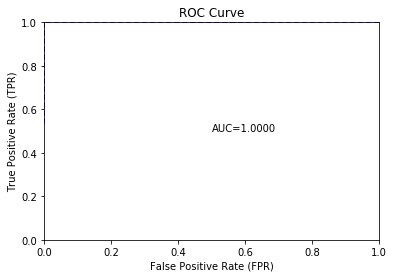

In [11]:
perf = glm_model.model_performance()  #train=True is the default, so it's not needed
perf.plot()

### V Regresion Logistica para Loan usando scikit-learn 

In [21]:
#A-Usando la codificacion OneHot para la variable Status Marital Esta es la que recomineda scikit-learn
df = pd.read_csv("https://academic.uprm.edu/eacuna/datosarbol.csv")
y=df['Prestamo']
data=df.iloc[:,0:6]
#Codificando 0-1 las Variables Sexo y CasPropia
lb_make = LabelEncoder()
data["Sexo"] = lb_make.fit_transform(data["Sexo"])
data['CasPropia']=lb_make.fit_transform(data["CasPropia"])
data1=data['StatustMarital']
#Aplicando OneHot encoding a la predictora StatustMarital
data2=pd.get_dummies(data1,prefix=['StatustMarital'])
data3=pd.concat([data.iloc[:,0:5],data2],axis=1)
y2=lb_make.fit_transform(y)
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression()
model = model.fit(data3, y2)
print "Coeficientes del modelo", model.coef_

Coeficientes del modelo [[ -5.29737023e-01  -2.76481560e-01   1.47706108e-01  -1.56249715e-02
    9.18278248e-04   7.46455735e-01  -1.50045754e+00  -1.84259422e-01
    2.12298599e-01]]


In [13]:
# Tasa de precision
model.score(data3, y2)
predictions = model.predict(data3)
print(classification_report(y2, predictions))

             precision    recall  f1-score   support

          0       1.00      0.70      0.82        10
          1       0.83      1.00      0.91        15

avg / total       0.90      0.88      0.87        25



In [20]:
# B-Usando la codificacion con variables dummies
data4=pd.get_dummies(data1,prefix=['StatustMarital'], drop_first=True)
data5=pd.concat([data.iloc[:,0:5],data4],axis=1)
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression()
model = model.fit(data5, y2)
model.score(data5, y2)
predictions = model.predict(data5)
print "coeficientes del modelo", model.coef_
print(classification_report(y2, predictions))

coeficientes del modelo [[ -6.32085308e-01  -2.47603396e-01   2.14801834e-01  -2.42867178e-02
    9.26727855e-04  -1.61010971e+00  -1.86962181e-01   1.95097244e-01]]
             precision    recall  f1-score   support

          0       1.00      0.60      0.75        10
          1       0.79      1.00      0.88        15

avg / total       0.87      0.84      0.83        25



In [18]:
#Usando una codificacion Trivial de Status Marital
data['StatustMarital']=lb_make.fit_transform(data["StatustMarital"])
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression()
model = model.fit(data, y2)
model.score(data, y2)
predictions = model.predict(data)
print "Coeficientes del modelo", model.coef_
print(classification_report(y2, predictions))

Coefientes del modelo [[-0.5576086  -0.21702577  0.33309214 -0.00594977  0.00070452 -0.16576325]]
             precision    recall  f1-score   support

          0       1.00      0.30      0.46        10
          1       0.68      1.00      0.81        15

avg / total       0.81      0.72      0.67        25

